# Using GeoPandas

**Setting up the conda env:**

```
conda create -n geo python=3.8
conda activate geo
conda install mamba -c conda-forge
mamba install geemap geopandas descartes rtree=0.9.3 -c conda-forge
mamba install ipython-sql sqlalchemy psycopg2 -c conda-forge
```

**Sample dataset:**
- [nyc_data.zip](https://github.com/giswqs/postgis/raw/master/data/nyc_data.zip) (Watch this [video](https://youtu.be/fROzLrjNDrs) to load data into PostGIS)

**References**:
- [Introduction to PostGIS](https://postgis.net/workshops/postgis-intro)
- [Using SQL with Geodatabases](https://desktop.arcgis.com/en/arcmap/latest/manage-data/using-sql-with-gdbs/sql-and-enterprise-geodatabases.htm)

## Connecting to the database

In [1]:
import os
from sqlalchemy import create_engine

In [2]:
host = "localhost"
database = "nyc"
user = os.getenv('SQL_USER')
password = os.getenv('SQL_PASSWORD')

In [3]:
connection_string = f"postgresql://{user}:{password}@{host}/{database}"

In [4]:
engine = create_engine(connection_string)

In [5]:
from sqlalchemy import inspect

In [6]:
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys',
 'nyc_neighborhoods',
 'nyc_streets',
 'nyc_homicides',
 'geometries',
 'nyc_census_blocks',
 'nyc_subway_stations']

## Reading data from PostGIS

In [7]:
import geopandas as gpd

In [8]:
sql = 'SELECT * FROM nyc_neighborhoods'

In [9]:
gdf = gpd.read_postgis(sql, con=engine)

In [10]:
gdf

,id,geom,boroname,name
0,1,"MULTIPOLYGON (((582771.426 4495167.427, 584651...",Brooklyn,Bensonhurst
1,2,"MULTIPOLYGON (((585508.753 4509691.267, 586826...",Manhattan,East Village
2,3,"MULTIPOLYGON (((583263.278 4509242.626, 583276...",Manhattan,West Village
3,4,"MULTIPOLYGON (((597640.009 4520272.720, 597647...",The Bronx,Throggs Neck
4,5,"MULTIPOLYGON (((595285.205 4525938.798, 595348...",The Bronx,Wakefield-Williamsbridge
...,...,...,...,...
124,125,"MULTIPOLYGON (((584212.898 4502321.474, 584306...",Brooklyn,Red Hook
125,126,"MULTIPOLYGON (((605082.288 4513540.148, 605091...",Queens,Douglastown-Little Neck
126,127,"MULTIPOLYGON (((600138.493 4516909.499, 600138...",Queens,Whitestone
127,128,"MULTIPOLYGON (((593231.553 4515088.539, 593306...",Queens,Steinway


In [11]:
gdf.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 78°W to 72°W and NAD83 by country
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Writing files

In [12]:
out_dir = os.path.expanduser('~/Downloads')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [13]:
out_json = os.path.join(out_dir, 'nyc_neighborhoods.geojson')
gdf.to_file(out_json, driver="GeoJSON")

In [14]:
out_shp = os.path.join(out_dir, 'nyc_neighborhoods.shp')
gdf.to_file(out_shp)

In [15]:
gdf.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 78°W to 72°W and NAD83 by country
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Measuring area

In [16]:
gdf = gdf.set_index("name")

In [17]:
gdf["area"] = gdf.area
gdf["area"]

name
Bensonhurst                 5.828014e+06
East Village                1.632117e+06
West Village                1.044615e+06
Throggs Neck                8.274104e+06
Wakefield-Williamsbridge    6.925334e+06
                                ...     
Red Hook                    1.146229e+05
Douglastown-Little Neck     1.753248e+07
Whitestone                  2.804182e+04
Steinway                    1.232809e+06
Rosebank                    4.855008e+04
Name: area, Length: 129, dtype: float64

## Getting polygon bounary

In [18]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

name
Bensonhurst                 MULTILINESTRING ((582771.426 4495167.427, 5846...
East Village                MULTILINESTRING ((585508.753 4509691.267, 5868...
West Village                MULTILINESTRING ((583263.278 4509242.626, 5832...
Throggs Neck                MULTILINESTRING ((597640.009 4520272.720, 5976...
Wakefield-Williamsbridge    MULTILINESTRING ((595285.205 4525938.798, 5953...
                                                  ...                        
Red Hook                    MULTILINESTRING ((584212.898 4502321.474, 5843...
Douglastown-Little Neck     MULTILINESTRING ((605082.288 4513540.148, 6050...
Whitestone                  MULTILINESTRING ((600138.493 4516909.499, 6001...
Steinway                    MULTILINESTRING ((593231.553 4515088.539, 5933...
Rosebank                    MULTILINESTRING ((579051.030 4495284.647, 5790...
Name: boundary, Length: 129, dtype: geometry

## Getting polygon centroid

In [19]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

name
Bensonhurst                 POINT (584653.928 4495863.485)
East Village                POINT (585979.191 4508859.571)
West Village                POINT (583832.311 4509898.957)
Throggs Neck                POINT (599226.101 4519629.728)
Wakefield-Williamsbridge    POINT (596720.653 4527170.627)
                                         ...              
Red Hook                    POINT (583382.229 4501563.758)
Douglastown-Little Neck     POINT (607360.858 4511731.933)
Whitestone                  POINT (599563.892 4517128.417)
Steinway                    POINT (592429.851 4515507.528)
Rosebank                    POINT (579260.556 4495409.906)
Name: centroid, Length: 129, dtype: geometry

## Making maps

<AxesSubplot:>

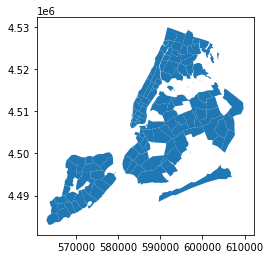

In [20]:
gdf.plot()

<AxesSubplot:>

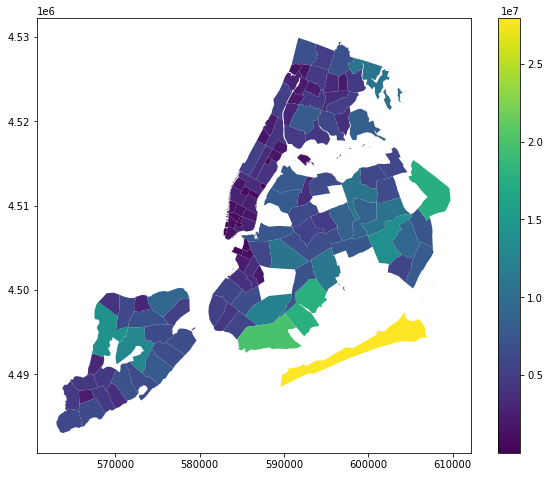

In [21]:
gdf.plot("area", legend=True, figsize=(10, 8))

<AxesSubplot:>

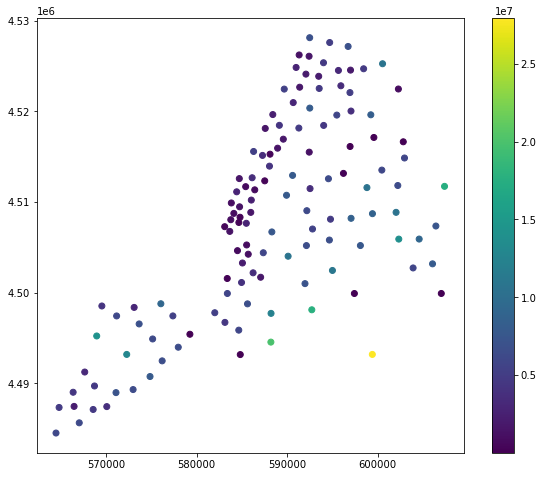

In [22]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True, figsize=(10, 8))

<AxesSubplot:>

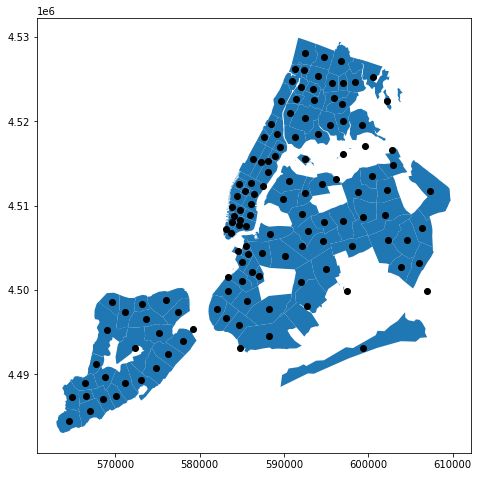

In [23]:
ax = gdf["geom"].plot(figsize=(10, 8))
gdf["centroid"].plot(ax=ax, color="black")

In [24]:
gdf = gdf.set_geometry("geom")

## Reprojecting data

In [25]:
sql = 'SELECT * FROM nyc_neighborhoods'

In [26]:
gdf = gpd.read_postgis(sql, con=engine)

In [27]:
gdf_crs = gdf.to_crs(epsg="4326")

In [28]:
gdf_crs

,id,geom,boroname,name
0,1,"MULTIPOLYGON (((-74.02167 40.60318, -73.99913 ...",Brooklyn,Bensonhurst
1,2,"MULTIPOLYGON (((-73.98734 40.73372, -73.97184 ...",Manhattan,East Village
2,3,"MULTIPOLYGON (((-74.01399 40.72991, -74.01381 ...",Manhattan,West Village
3,4,"MULTIPOLYGON (((-73.84204 40.82767, -73.84190 ...",The Bronx,Throggs Neck
4,5,"MULTIPOLYGON (((-73.86910 40.87898, -73.86831 ...",The Bronx,Wakefield-Williamsbridge
...,...,...,...,...
124,125,"MULTIPOLYGON (((-74.00367 40.66747, -74.00256 ...",Brooklyn,Red Hook
125,126,"MULTIPOLYGON (((-73.75494 40.76612, -73.75483 ...",Queens,Douglastown-Little Neck
126,127,"MULTIPOLYGON (((-73.81296 40.79708, -73.81296 ...",Queens,Whitestone
127,128,"MULTIPOLYGON (((-73.89509 40.78149, -73.89419 ...",Queens,Steinway


In [29]:
geojson = gdf_crs.__geo_interface__

## Displaying data on an interative map

In [30]:
import geemap

In [31]:
m = geemap.Map(center=[40.7341, -73.9113], zoom=10, ee_initialize=False)
m

Map(center=[40.7341, -73.9113], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [32]:
style = {
    "stroke": True,
    "color": "#000000",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.4,
}

In [33]:
m.add_geojson(geojson, style=style, layer_name="nyc neighborhoods")

In [34]:
sql2 = 'SELECT * FROM nyc_subway_stations'

In [35]:
gdf_subway = gpd.read_postgis(sql2, con=engine)

In [36]:
gdf_subway_crs = gdf_subway.to_crs(epsg="4326")

In [37]:
subway_geojson = gdf_subway_crs.__geo_interface__

In [38]:
m.add_geojson(subway_geojson, layer_name="nyc subway stations")

In [39]:
sql3 = "SELECT * FROM nyc_census_blocks WHERE boroname='Manhattan'"

In [40]:
gdf_blocks = gpd.read_postgis(sql3, con=engine)

In [41]:
gdf_blocks_crs = gdf_blocks.to_crs(epsg="4326")

In [42]:
blocks_geojson = gdf_blocks_crs.__geo_interface__

In [43]:
m.add_geojson(blocks_geojson, style=style, layer_name="nyc census blocks")

In [44]:
sql4 = "SELECT geom FROM nyc_homicides WHERE boroname='Manhattan'"

In [45]:
gdf_homicides = gpd.read_postgis(sql4, con=engine)

In [46]:
gdf_homicides_crs = gdf_homicides.to_crs(epsg="4326")

In [47]:
homicides_geojson = gdf_homicides_crs.__geo_interface__

In [48]:
m.add_geojson(homicides_geojson, style=style, layer_name="nyc homicides")